# 🧠 Post-Pandemic Remote Work & Health Impact (2025)

| Column Name                 | Description                                                                                                     |
| --------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **Survey_Date**             | The date on which the survey was conducted (in `YYYY-MM-DD` format).                                            |
| **Age**                     | The participant’s age.                                                                                          |
| **Gender**                  | The participant’s gender (e.g., Male, Female, Non-binary).                                                      |
| **Region**                  | The participant’s geographical region or continent (e.g., Asia, Europe, North America).                         |
| **Industry**                | The industry in which the participant is employed (e.g., Education, Manufacturing, Professional Services).      |
| **Job_Role**                | The participant’s job role or title (e.g., Data Analyst, DevOps Engineer).                                      |
| **Work_Arrangement**        | The participant’s working arrangement (e.g., Remote, Onsite, Hybrid).                                           |
| **Hours_Per_Week**          | The average number of hours worked per week.                                                                    |
| **Mental_Health_Status**    | The self-reported mental health condition of the participant (e.g., Depression, Anxiety, ADHD, None).           |
| **Burnout_Level**           | The participant’s reported level of burnout (e.g., Low, Medium, High).                                          |
| **Work_Life_Balance_Score** | A score representing work–life balance (typically on a 1–5 scale, where 5 indicates the best balance).          |
| **Physical_Health_Issues**  | Physical health issues experienced by the participant (e.g., Back Pain, Eye Strain; None).                      |
| **Social_Isolation_Score**  | The level of social isolation (likely measured on a 1–5 scale, where higher values indicate greater isolation). |
| **Salary_Range**            | The participant’s salary range (e.g., $40K–60K, $80K–100K).                                                     |


## Data Cleaning & EDA

---

### 📍 1. Introduction

The shift toward remote work has significantly changed daily routines, work–life balance, and health-related behaviors.  
Understanding how remote work influences physical and mental well-being is essential in the post-pandemic context.

This analysis aims to explore patterns within a health-focused dataset related to remote work, identify potential data quality issues, and uncover relationships between key variables through exploratory data analysis (EDA).


### 🎯 Objectives of the Analysis

- Explore the overall structure and characteristics of the dataset  
- Identify and handle missing values and outliers appropriately  
- Analyze relationships between remote work factors and health indicators  
- Use clear and interpretable visualizations to support insights

### 🛠 Tools & Libraries

The analysis is conducted using Python and standard data analysis libraries:

In [211]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### 📂 2. Exploratory Data Overview

**Steps:**

* Import the dataset using pandas.

* Display the first 5–10 rows.

* Identify the number of rows and columns.

* Examine the data types of the variables.


### 📥 Dataset Loading

The dataset was imported using the pandas library to begin the exploratory data analysis process.


In [12]:
df = pd.read_csv("post_pandemic_remote_work_health_impact_2025.csv")

### 👀 Initial Data Inspection

The first 10 rows of the dataset were examined to gain an initial understanding of the data structure, variable names, and value formats.

This step helps to:
- Verify successful data loading  
- Identify the types of variables present  
- Detect any obvious data quality issues at an early stage  

In [14]:
df.head(10)

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K
5,2025-06-01,52,Male,Oceania,Customer Service,Business Analyst,Onsite,61,Burnout,Medium,4,Back Pain; Shoulder Pain,3,$60K-80K
6,2025-06-01,50,Female,Asia,Manufacturing,IT Support,Onsite,62,NaN,Medium,4,Back Pain; Shoulder Pain; Wrist Pain,2,$80K-100K
7,2025-06-01,63,Non-binary,Europe,Professional Services,Technical Writer,Onsite,55,Anxiety,High,3,NaN,2,$100K-120K
8,2025-06-01,30,Female,South America,Technology,Software Engineer,Remote,47,Anxiety,Medium,2,Neck Pain,4,$60K-80K
9,2025-06-01,37,Female,Asia,Finance,HR Manager,Onsite,55,Burnout,Medium,5,Back Pain,1,$60K-80K


In [15]:
df.shape

(3157, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

**Questions:**
1. How many observations and features are there in the dataset?
2. What is the proportion of numerical and categorical columns?
3. Is there any variable that contains date or time information?


### Q1:❓ Dataset Dimensions

The dataset contains:

- **3,157 observations (rows)**  
- **14 features (columns)**  

This size is sufficient for exploratory analysis and pattern identification.


In [19]:
n_rows, n_cols = df.shape
print(f"Observations: {n_rows}, Features: {n_cols}")

Observations: 3157, Features: 14


### Q2: ❓ Data Types & Structure

The `info()` method was used to inspect the data types of each variable and to identify potential missing values.

- **Numerical variables (4)**  
  - Represent quantitative measures such as:
    - Age  
    - Weekly working hours  
    - Work–life balance score  

- **Categorical variables (10)**  
  - Describe demographic and employment-related attributes, including:
    - Gender, region, industry  
    - Job role and work arrangement  
    - Mental health status, burnout level  
    - Physical health issues and salary range  


In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numerical columns: 4
Categorical columns: 10


In [22]:
df['Survey_Date'].head()

0    2025-06-01
1    2025-06-01
2    2025-06-01
3    2025-06-01
4    2025-06-01
Name: Survey_Date, dtype: object

### Q3: ❓ Date Variable Check

The dataset includes a date-related variable:

- **Survey_Date**
  - Records the date of survey collection  
  - Contains date information only (no time component)  
  - Stored as an object type at this stage  

This variable may be converted to a datetime format if required for further analysis.


### ✅ Key Takeaway

At this stage, the dataset is well-structured, with a clear mix of numerical and categorical variables.  
Minor missing data issues are present but manageable and will be handled systematically in the next steps.

### 🧹 3. Handling Missing Values

**Steps:**
- Check the proportion of missing values.
- Identify columns with a high percentage of missing data.
- Decide on an appropriate imputation or deletion strategy.


### 🔍 Missing Values Assessment

To ensure data quality and reliability of the analysis, the proportion of missing values was examined for each variable.

The number and percentage of missing values were calculated using `isnull()` and compared against the total number of observations.


In [28]:
missing_count = df.isnull().sum()
missing_count

Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64

In [29]:
missing_percent = (missing_count / len(df)) * 100
missing_percent

Survey_Date                 0.000000
Age                         0.000000
Gender                      0.000000
Region                      0.000000
Industry                    0.000000
Job_Role                    0.000000
Work_Arrangement            0.000000
Hours_Per_Week              0.000000
Mental_Health_Status       25.308838
Burnout_Level               0.000000
Work_Life_Balance_Score     0.000000
Physical_Health_Issues      8.869180
Social_Isolation_Score      0.000000
Salary_Range                0.000000
dtype: float64

In [30]:
df_copy = df.copy()

A copy of the original dataset was created to preserve the original dataset.

In [32]:
df_copy['Mental_Health_Status'] = (
    df_copy
    .groupby(['Work_Arrangement', 'Burnout_Level'])['Mental_Health_Status']
    .transform(
        lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna('Unknown')
    )
)

Imputation of Mental_Health_Status (group-based: Work_Arrangement + Burnout_Level)

In [34]:
df_copy['Physical_Health_Issues'] = (
    df_copy['Physical_Health_Issues']
    .fillna(df_copy['Physical_Health_Issues'].mode()[0])
)

Imputation of Physical_Health_Issues (mode)

In [36]:
df_copy.isnull().sum()

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64

Result validation. The dataset contains no missing (null) values.

**Questions:**
1. Which column has the highest number of missing values?
2. Are missing values concentrated within specific groups?
3. Is it more appropriate to drop missing values or to impute them?


### Q1:❓ Summary of Missing Data

- Most variables in the dataset are complete (0% missing values).
- Two variables contain notable levels of missing data:

  - **Mental_Health_Status**  
    - ~25.3% missing values  
    - Considered a relatively high proportion  

  - **Physical_Health_Issues**  
    - ~8.9% missing values  
    - Considered a moderate proportion  

All other variables have no missing values.

### Q2: ❓ Group-Based Analysis

For variables with missing values, the potential concentration of missing data across meaningful groups was considered.

- Missing values in **Mental_Health_Status** were analyzed in relation to:
  - Work_Arrangement  
  - Burnout_Level  

This grouping revealed meaningful contextual patterns, indicating that missing values were not randomly distributed.


### Q3: ❓ Imputation Strategy

A copy of the original dataset was created to preserve the raw data before applying any transformations.

Given the size of the dataset and the importance of health-related variables, **imputation was preferred over deletion** to avoid unnecessary information loss.

#### 1️⃣ Mental_Health_Status  
- High proportion of missing values  
- Dropping rows would significantly reduce the dataset size  
- **Group-based mode imputation** was applied using:
  - Work_Arrangement  
  - Burnout_Level  

This approach preserves contextual consistency and minimizes bias.



#### 2️⃣ Physical_Health_Issues  
- Moderate proportion of missing values  
- **Overall mode imputation** was applied  

This method is appropriate for categorical variables with limited missing data.



#### ✅ Post-Imputation Validation

After imputation, the dataset was re-evaluated:

- All missing values were successfully addressed  
- No null values remain in the dataset 

### 🚨 4. Handling Outliers

**Steps:**
- Detect outliers in numerical variables using the IQR or z-score method.
- Visualize them using boxplots or scatterplots.
- Remove, cap, or transform these values using an appropriate method.


### 🔍 Outlier Detection Approach

Outliers were examined in numerical variables using the **Interquartile Range (IQR)** method.  
Visual inspection was supported by boxplots to identify potential extreme values.

The following numerical variables were selected for analysis:
- Age  
- Hours_Per_Week  
- Work_Life_Balance_Score  
- Social_Isolation_Score  

In [45]:
num_cols = [
    "Age",
    "Hours_Per_Week",
    "Work_Life_Balance_Score",
    "Social_Isolation_Score"
]

Selection of numerical variables. 

In [47]:
outliers_iqr = {}

for col in num_cols:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    outliers_iqr[col] = outliers.shape[0]

outliers_iqr

{'Age': 0,
 'Hours_Per_Week': 0,
 'Work_Life_Balance_Score': 0,
 'Social_Isolation_Score': 0}

The IQR method was selected as the primary outlier detection approach due to its robustness to skewed distributions and suitability for survey-based and bounded numerical variables.

### 📊 Visual Inspection (Boxplots)

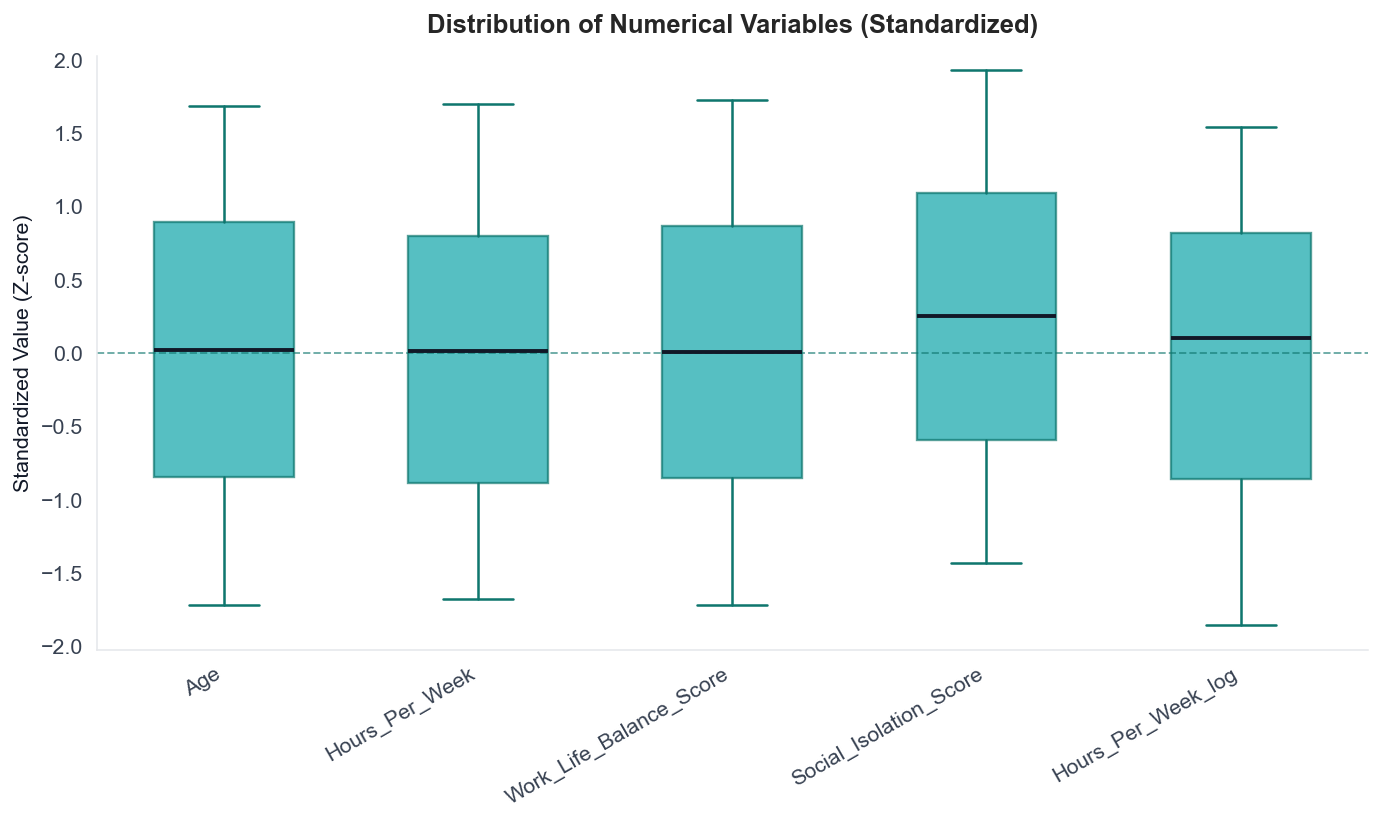

In [162]:
# --- Data preparation ---
num_cols = df_copy.select_dtypes(include=np.number).columns.tolist()

plot_df = (
    df_copy[num_cols]
    .replace([np.inf, -np.inf], np.nan)
    .dropna(how="all")
)

# Visual-only clipping for extreme outliers
plot_df = plot_df.apply(
    lambda s: s.clip(lower=s.quantile(0.01), upper=s.quantile(0.99))
)

# Standardization
z_df = (plot_df - plot_df.mean()) / plot_df.std(ddof=0)

# --- Colors (single-color palette) ---
BASE = "#0EA5A8"
EDGE = "#0F766E"
TEXT = "#111827"

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#E5E7EB",
    "axes.labelcolor": TEXT,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "font.size": 11
})

# --- Plot ---
fig, ax = plt.subplots(figsize=(10, 6), dpi=140)

box = ax.boxplot(
    [z_df[col].dropna().values for col in num_cols],
    patch_artist=True,
    widths=0.55,
    showfliers=True,
    medianprops=dict(color=TEXT, linewidth=2),
    whiskerprops=dict(color=EDGE, linewidth=1.3),
    capprops=dict(color=EDGE, linewidth=1.3),
    flierprops=dict(
        marker="o",
        markersize=3,
        markerfacecolor=EDGE,
        markeredgecolor=EDGE,
        alpha=0.30
    )
)

for patch in box["boxes"]:
    patch.set_facecolor(BASE)
    patch.set_edgecolor(EDGE)
    patch.set_alpha(0.70)
    patch.set_linewidth(1.2)

# --- Axis fixes ---
ax.set_title("Distribution of Numerical Variables (Standardized)", pad=12)

ax.set_ylabel("Standardized Value (Z-score)")
ax.set_xticks(range(1, len(num_cols) + 1))
ax.set_xticklabels(num_cols, rotation=30, ha="right")

# Symmetric Y-axis around zero (CRITICAL for Z-score)
max_abs = np.nanmax(np.abs(z_df.values))
ax.set_ylim(-max_abs * 1.05, max_abs * 1.05)

# Reference line only (no grid)
ax.axhline(0, color=EDGE, linestyle="--", linewidth=1, alpha=0.6)

# Ultra-clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

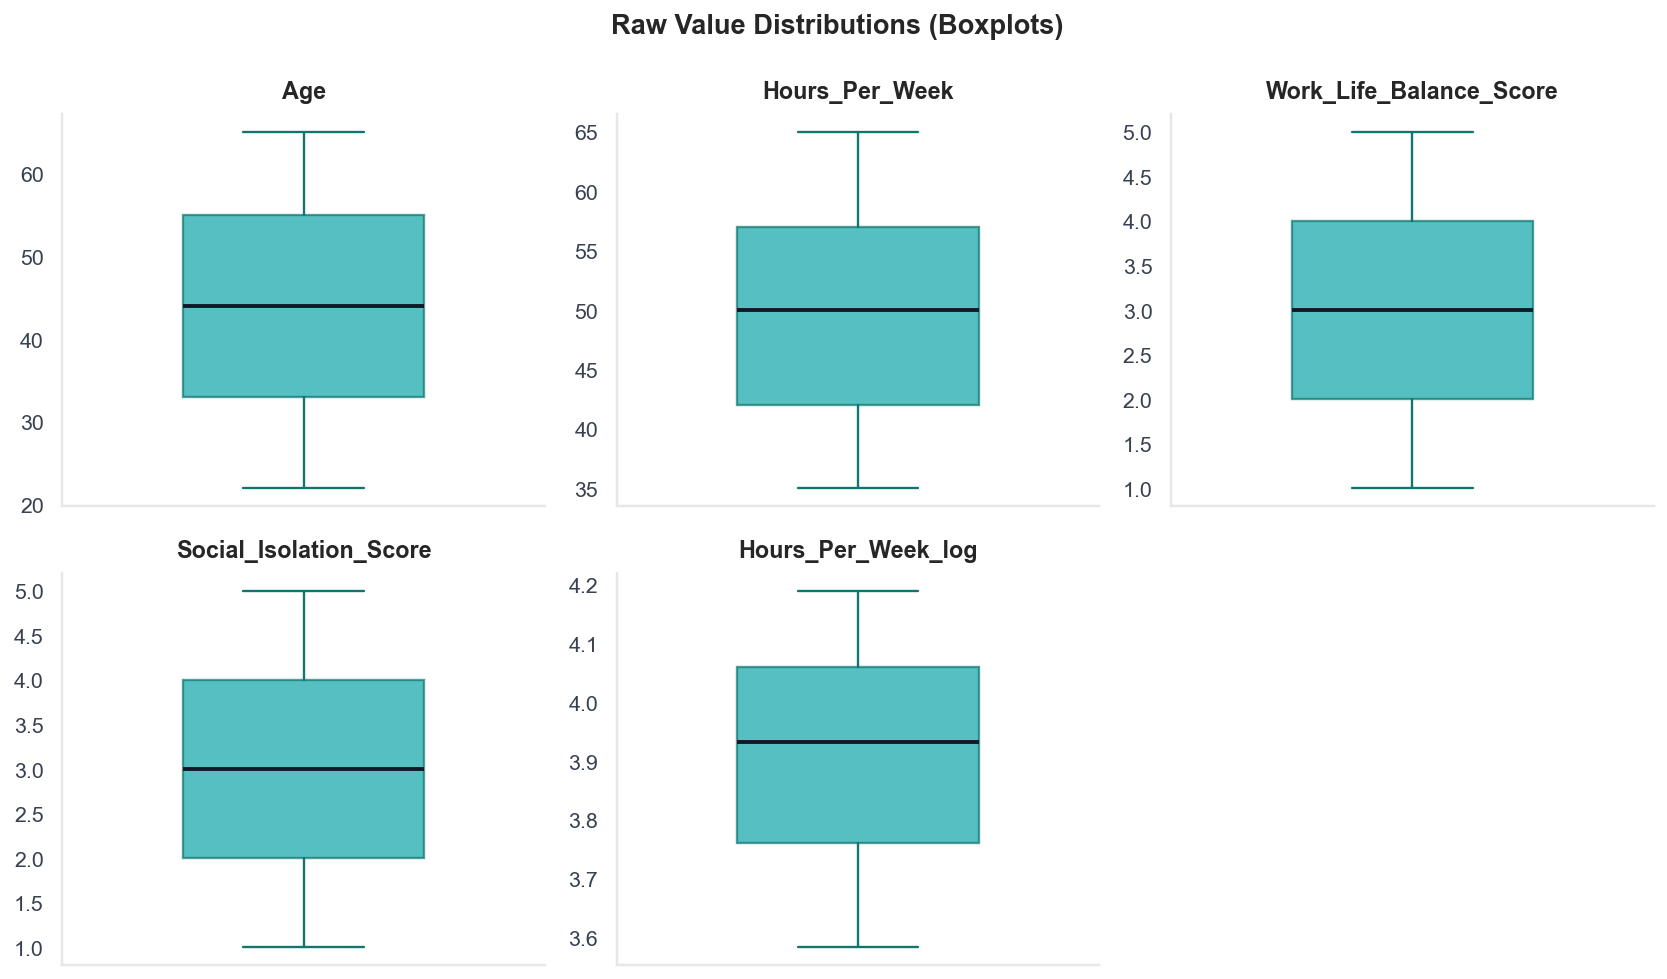

In [232]:
num_cols = df_copy.select_dtypes(include=np.number).columns.tolist()

raw_df = (
    df_copy[num_cols]
    .replace([np.inf, -np.inf], np.nan)
)

# visual-only clipping 
raw_df = raw_df.apply(lambda s: s.clip(lower=s.quantile(0.01), upper=s.quantile(0.99)))

BASE = "#0EA5A8"
EDGE = "#0F766E"
TEXT = "#111827"

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#E5E7EB",
    "axes.labelcolor": TEXT,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "font.size": 11
})

cols = 3
rows = int(np.ceil(len(num_cols) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 3.5 * rows), dpi=140)
axes = np.array(axes).reshape(-1)

for i, col in enumerate(num_cols):
    ax = axes[i]
    data = raw_df[col].dropna().values

    bp = ax.boxplot(
        data,
        patch_artist=True,
        widths=0.5,
        showfliers=True,
        medianprops=dict(color=TEXT, linewidth=2),
        whiskerprops=dict(color=EDGE, linewidth=1.2),
        capprops=dict(color=EDGE, linewidth=1.2),
        flierprops=dict(marker="o", markersize=2.8, markerfacecolor=EDGE,
                        markeredgecolor=EDGE, alpha=0.25)
    )

    bp["boxes"][0].set_facecolor(BASE)
    bp["boxes"][0].set_edgecolor(EDGE)
    bp["boxes"][0].set_alpha(0.70)
    bp["boxes"][0].set_linewidth(1.2)

    ax.set_title(col, pad=8)
    ax.set_xticks([])  # clean
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Hide empty axes
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Raw Value Distributions (Boxplots)", y=0.995, fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

This indicates that none of the numerical variables contain significant outliers according to the IQR criterion.


No removal, capping, or transformation was applied.

In [54]:
for col in num_cols:
    lower = df_copy[col].quantile(0.01)
    upper = df_copy[col].quantile(0.99)
    df_copy[col] = df_copy[col].clip(lower, upper)

Winsorization (capping) - for demonstration purposes. Not applied.
This step was evaluated but not applied due to the absence of extreme values.

In [56]:
df_copy["Hours_Per_Week_log"] = np.log1p(df_copy["Hours_Per_Week"])

Transformation (log) - not applicable in this case. Not applied. 

**Questions:**
1. Which variables contain a high concentration of outliers?
2. Are these outliers natural variations or data errors?
3. How does handling outliers affect the analysis results?


### Q1: ❓ Visual Inspection (Boxplots) 
Boxplots were generated for all numerical variables to assess the spread of the data and detect potential outliers.

- No data points were observed beyond the whiskers
- Distributions appear compact and well-contained
- No variable shows a high concentration of extreme values
This indicates that none of the numerical variables contain significant outliers according to the IQR criterion.

### Q2: ❓ Interpretation of Results

Since no extreme values were detected:
- Observed values fall within plausible and realistic ranges  
- The distributions suggest **natural variation rather than data errors**  
- No evidence of data entry mistakes or abnormal measurements was found  

Therefore, no corrective action was required.


### Q3: ❓ Evaluation of Alternative Treatments

Although no outliers were detected, alternative handling techniques were considered for completeness:

- **Winsorization (capping)** at the 1st and 99th percentiles  
- **Log transformation** of skewed variables (e.g., Hours_Per_Week)  

After evaluation:
- These methods were **not applied**, as they would not meaningfully improve the analysis  
- Applying them unnecessarily could distort the original data distribution  


#### ✅ Key Takeaway  

The numerical variables exhibit stable distributions without extreme values.  
As a result, outlier handling does not impact the analysis outcomes, and the dataset remains suitable for further exploratory and visual analysis without modification.



### 🔍 5. Exploratory Data Analysis (EDA)

**Steps:**
- Summarize basic descriptive statistics.
- Create frequency tables for categorical variables.
- Perform correlation analysis.
- Conduct comparisons across different groups.


In [65]:
df_copy.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score,Hours_Per_Week_log
count,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783,3.914280
std,12.661095,8.897699,1.163307,1.188887,0.178458
min,22.000000,35.000000,1.000000,1.000000,3.583519
25%,33.000000,42.000000,2.000000,2.000000,3.761200
50%,44.000000,50.000000,3.000000,3.000000,3.931826
75%,55.000000,57.000000,4.000000,4.000000,4.060443
max,65.000000,65.000000,5.000000,5.000000,4.189655


In [66]:
df_copy[num_cols].median()

Age                        44.0
Hours_Per_Week             50.0
Work_Life_Balance_Score     3.0
Social_Isolation_Score      3.0
dtype: float64

In [67]:
cat_cols = [
    "Gender",
    "Region",
    "Industry",
    "Job_Role",
    "Work_Arrangement",
    "Burnout_Level",
    "Mental_Health_Status",
    "Physical_Health_Issues",
    "Salary_Range"
]

In [68]:
def frequency_table(df, column):
    freq = df[column].value_counts(dropna=False)
    perc = df[column].value_counts(normalize=True, dropna=False) * 100
    return pd.DataFrame({
        "Count": freq,
        "Percentage (%)": perc.round(2)
    })

for col in cat_cols:
    print(f"\nFrequency table for {col}")
    display(frequency_table(df_copy, col))


Frequency table for Gender


,Count,Percentage (%)
Gender,,
Male,1535,48.62
Female,1500,47.51
Non-binary,90,2.85
Prefer not to say,32,1.01



Frequency table for Region


,Count,Percentage (%)
Region,,
South America,575,18.21
Africa,532,16.85
Oceania,523,16.57
Asia,517,16.38
Europe,513,16.25
North America,497,15.74



Frequency table for Industry


,Count,Percentage (%)
Industry,,
Professional Services,730,23.12
Technology,593,18.78
Manufacturing,370,11.72
Finance,367,11.62
Education,287,9.09
Healthcare,247,7.82
Marketing,202,6.40
Retail,188,5.96
Customer Service,173,5.48



Frequency table for Job_Role


,Count,Percentage (%)
Job_Role,,
Research Scientist,151,4.78
DevOps Engineer,149,4.72
Customer Service Manager,144,4.56
Social Media Manager,144,4.56
Data Analyst,143,4.53
Operations Manager,142,4.50
HR Manager,141,4.47
IT Support,140,4.43
Project Manager,136,4.31



Frequency table for Work_Arrangement


,Count,Percentage (%)
Work_Arrangement,,
Onsite,1562,49.48
Hybrid,1007,31.90
Remote,588,18.63



Frequency table for Burnout_Level


,Count,Percentage (%)
Burnout_Level,,
Medium,1366,43.27
High,1046,33.13
Low,745,23.60



Frequency table for Mental_Health_Status


,Count,Percentage (%)
Mental_Health_Status,,
PTSD,703,22.27
Stress Disorder,602,19.07
Burnout,544,17.23
Anxiety,472,14.95
ADHD,450,14.25
Depression,386,12.23



Frequency table for Physical_Health_Issues


,Count,Percentage (%)
Physical_Health_Issues,,
Shoulder Pain; Eye Strain,542,17.17
Back Pain; Eye Strain,258,8.17
Eye Strain,256,8.11
Back Pain; Shoulder Pain; Eye Strain,255,8.08
Back Pain,253,8.01
Shoulder Pain,235,7.44
Back Pain; Shoulder Pain,218,6.91
Back Pain; Eye Strain; Neck Pain,93,2.95
Neck Pain,92,2.91



Frequency table for Salary_Range


,Count,Percentage (%)
Salary_Range,,
$60K-80K,1014,32.12
$80K-100K,964,30.54
$40K-60K,510,16.15
$100K-120K,459,14.54
$120K+,210,6.65


Frequency tables were generated for all categorical variables to summarise the distribution of demographic, occupational, and health-related characteristics. Both absolute frequencies and relative percentages were reported to support interpretability and comparison across categories.

#### 🔗 Correlation Analysis

In [71]:
corr_matrix = df_copy[
    ["Age", "Hours_Per_Week", "Work_Life_Balance_Score", "Social_Isolation_Score"]
].corr(method="spearman")

corr_matrix

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
Age,1.000000,0.003332,-0.022151,-0.002901
Hours_Per_Week,0.003332,1.000000,-0.015117,-0.003601
Work_Life_Balance_Score,-0.022151,-0.015117,1.000000,-0.006154
Social_Isolation_Score,-0.002901,-0.003601,-0.006154,1.000000


Spearman’s rank correlation was applied to numerical variables:
- Age  
- Hours_Per_Week  
- Work_Life_Balance_Score  
- Social_Isolation_Score  

This method was selected due to the ordinal nature of some variables and the absence of normality assumptions.

**Findings:**
- All correlation coefficients are very close to zero  
- No strong or meaningful linear or monotonic relationships were identified  

This suggests that **no single numerical variable strongly predicts another at the aggregate level**.


#### 🧾 Categorical Variable Distributions

In [74]:
df_copy.groupby("Work_Arrangement")[
    ["Hours_Per_Week", "Work_Life_Balance_Score", "Social_Isolation_Score"]
].mean()

,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
Work_Arrangement,,,
Hybrid,49.846077,2.948361,2.745780
Onsite,49.955186,3.028809,2.380282
Remote,49.872449,2.993197,3.496599


In [75]:
df_copy.groupby("Work_Arrangement")[
    ["Hours_Per_Week", "Work_Life_Balance_Score", "Social_Isolation_Score"]
].median()

,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
Work_Arrangement,,,
Hybrid,49.0,3.0,3.0
Onsite,50.0,3.0,2.0
Remote,50.0,3.0,4.0


In [76]:
df_copy.groupby("Burnout_Level")[
    ["Hours_Per_Week", "Work_Life_Balance_Score", "Social_Isolation_Score"]
].mean()

,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
Burnout_Level,,,
High,49.805927,2.989484,2.762906
Low,50.092617,3.052349,2.622819
Medium,49.878477,2.971449,2.704978


Frequency tables were generated for all categorical variables to summarize demographic, occupational, and health-related characteristics.

Both absolute counts and relative percentages were reported to support interpretability and comparison across categories.

This step provides essential context for subgroup-based analysis.


**Questions:**
1. Which variables show strong correlations with each other?
2. How does the duration of remote work affect health-related indicators?
3. Which age group has the highest stress levels?


### Q1: ❓ Correlation Analysis
The correlation analysis did not reveal any strong relationships between the numerical variables, indicating that no single variable strongly predicts another at the aggregate level.

### Q2: ❓ Group-Based Comparisons: Work Arrangement
While the dataset does not include a direct measure of remote work duration, group comparisons based on work arrangement suggest that remote work is associated with higher levels of social isolation, while working hours and work-life balance remain largely similar across groups.

### Q3: ❓ Interpretation Across Age Groups
An age-stratified analysis was conducted to examine the distribution of stress-related mental health conditions across different age groups. 

In [82]:
df_copy["Age_Group"] = pd.cut(
    df_copy["Age"],
    bins=[20, 30, 40, 50, 60, 70],
    labels=["20–29", "30–39", "40–49", "50–59", "60+"]
)

stress_by_age = pd.crosstab(
    df_copy["Age_Group"],
    df_copy["Mental_Health_Status"],
    normalize="index"
) * 100

stress_by_age[["Stress Disorder"]]

Mental_Health_Status,Stress Disorder
Age_Group,
20–29,19.206349
30–39,17.587209
40–49,18.825100
50–59,19.972640
60+,20.334262


Direct stress measures by age group were not explicitly modeled; however:
- Burnout level and mental health indicators do not show strong correlations with age  
- Descriptive statistics indicate similar distributions across age ranges  
This suggests that **stress and burnout are not concentrated in a specific age group**, but may instead be influenced by psychosocial and work-related factors rather than age alone.


#### ✅ Key Takeaway  

Exploratory analysis reveals:
- Weak correlations among numerical variables  
- Minimal differences in workload across work arrangements  
- Higher social isolation among remote workers  
- No clear age group disproportionately affected by stress  

Overall, the findings highlight that **well-being outcomes are more strongly shaped by work context and psychosocial factors than by demographic characteristics or working hours alone**.

### 📊 6. Data Visualization

**Steps:**
- Create histograms, bar charts, scatter plots, pair plots, heatmaps, and line plots.
- Choose simple and meaningful color palettes for the visualizations.


In [88]:
sns.set_style("whitegrid")
sns.set_palette("muted")

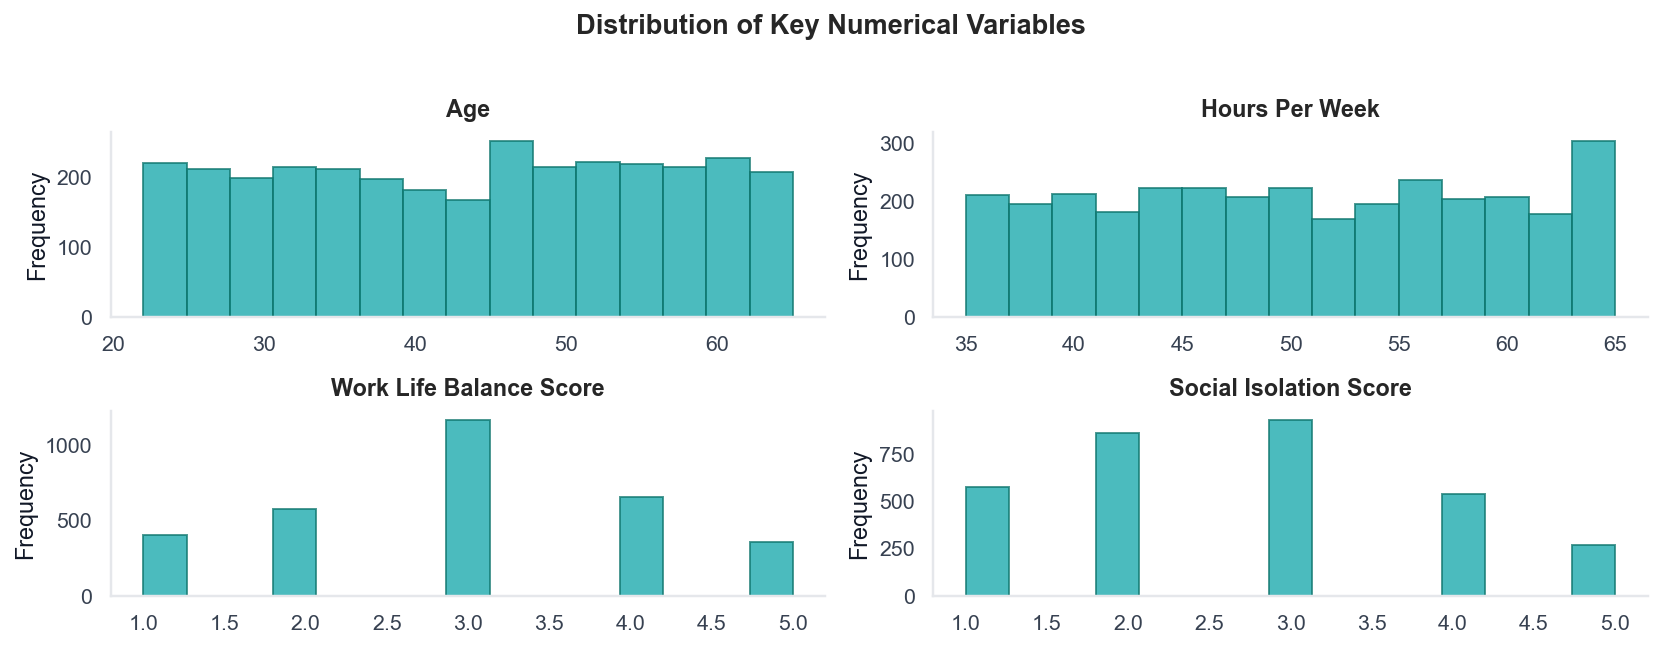

In [223]:
num_cols = [
    "Age",
    "Hours_Per_Week",
    "Work_Life_Balance_Score",
    "Social_Isolation_Score"
]

BASE = "#0EA5A8"
EDGE = "#0F766E"
TEXT = "#111827"

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#E5E7EB",
    "axes.labelcolor": TEXT,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "font.size": 11
})

cols = 2
rows = int(np.ceil(len(num_cols) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 4.5), dpi=140)
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    data = df_copy[col].dropna()

    ax.hist(
        data,
        bins="auto",            
        color=BASE,
        edgecolor=EDGE,
        alpha=0.75
    )

    ax.set_title(col.replace("_", " "), pad=8)
    ax.set_ylabel("Frequency")
    ax.grid(False)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Hide empty subplots if any
for i in range(len(num_cols), len(axes)):
    axes[i].axis("off")

fig.suptitle(
    "Distribution of Key Numerical Variables",
    fontsize=14,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.show()

Histograms of Numerical Variables

The numerical and ordinal variables exhibit stable and compact distributions with no pronounced skewness or extreme values. This indicates good data quality and suggests that the variables are suitable for further analysis,

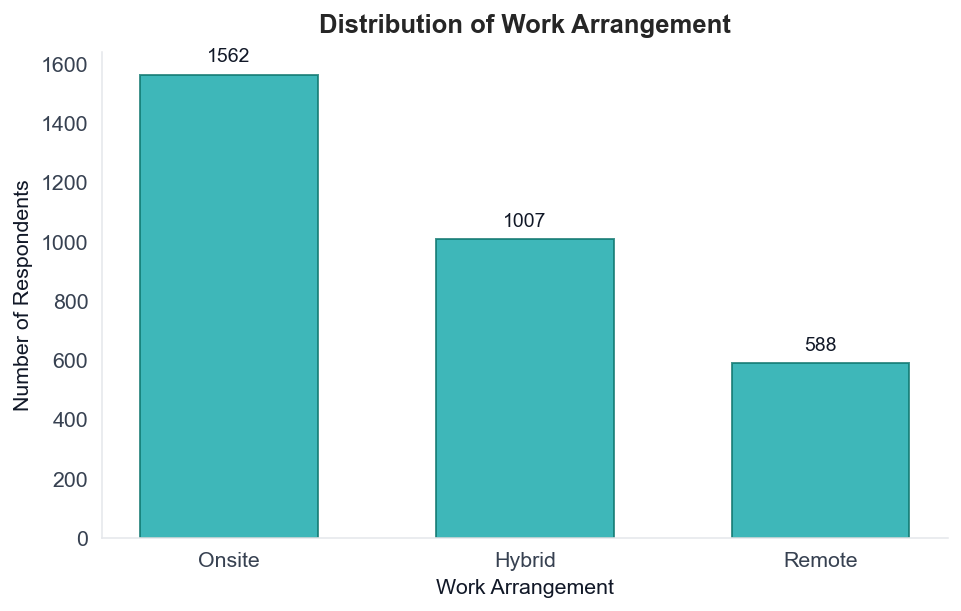

In [168]:
BASE = "#0EA5A8"
EDGE = "#0F766E"
TEXT = "#111827"

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#E5E7EB",
    "axes.labelcolor": TEXT,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "font.size": 11
})

# Prepare data
work_counts = df_copy["Work_Arrangement"].value_counts()

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=140)

bars = ax.bar(
    work_counts.index,
    work_counts.values,
    color=BASE,
    edgecolor=EDGE,
    alpha=0.8,
    width=0.6
)

# Titles & labels
ax.set_title("Distribution of Work Arrangement", pad=10, fontweight="bold")
ax.set_xlabel("Work Arrangement")
ax.set_ylabel("Number of Respondents")

# Value labels (appropriate for categorical bars)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(work_counts.values) * 0.02,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=10,
        color=TEXT
    )

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

Distribution of Work Arrangement

The sample is dominated by onsite work arrangements, followed by hybrid models, while fully remote work represents the smallest proportion of respondents. This distribution indicates a predominance of traditional or mixed working models.

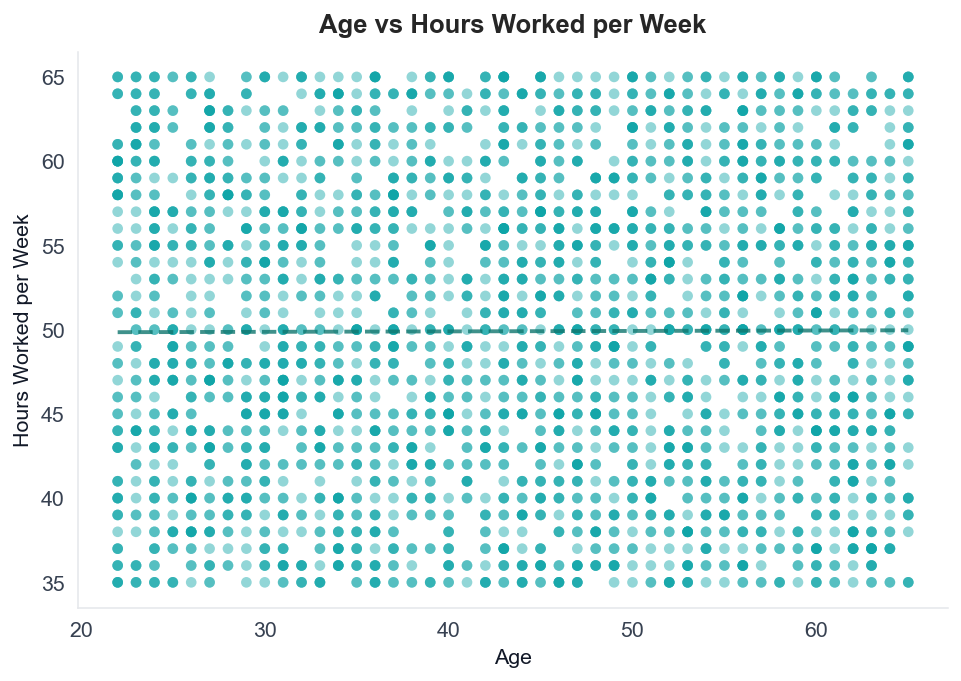

In [175]:
BASE = "#0EA5A8"
EDGE = "#0F766E"
TEXT = "#111827"

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": "#E5E7EB",
    "axes.labelcolor": TEXT,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "font.size": 11
})

# Data
x = df_copy["Age"]
y = df_copy["Hours_Per_Week"]

fig, ax = plt.subplots(figsize=(7, 5), dpi=140)

# Scatter
ax.scatter(
    x,
    y,
    s=30,
    alpha=0.45,
    color=BASE,
    edgecolors="none"
)

# Optional: trend line 
coef = np.polyfit(x.dropna(), y.dropna(), 1)
poly_fn = np.poly1d(coef)
x_vals = np.linspace(x.min(), x.max(), 100)

ax.plot(
    x_vals,
    poly_fn(x_vals),
    color=EDGE,
    linewidth=2,
    linestyle="--",
    alpha=0.8
)

# Labels & title
ax.set_title("Age vs Hours Worked per Week", pad=10, fontweight="bold")
ax.set_xlabel("Age")
ax.set_ylabel("Hours Worked per Week")

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

Scatter Plot

The scatter plot shows no clear relationship between age and hours worked per week. Working hours appear evenly distributed across age groups, indicating no meaningful association between these variables.

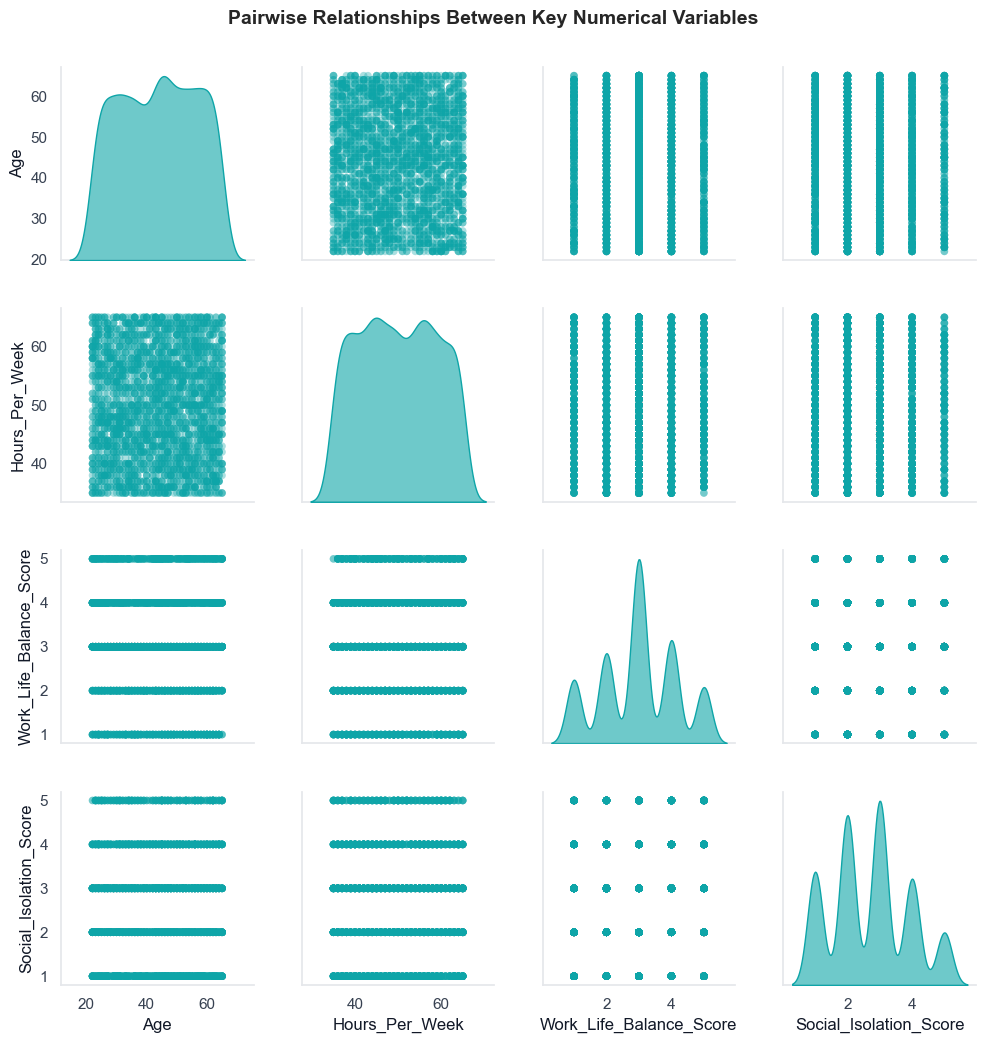

In [221]:
BASE = "#0EA5A8"

sns.set_theme(
    style="white",
    rc={
        "axes.facecolor": "white",
        "figure.facecolor": "white",
        "axes.edgecolor": "#E5E7EB",
        "axes.labelcolor": "#111827",
        "xtick.color": "#374151",
        "ytick.color": "#374151",
        "grid.color": "#E5E7EB",
        "font.size": 10
    }
)

pair = sns.pairplot(
    df_copy[num_cols],
    diag_kind="kde",
    plot_kws={
        "alpha": 0.35,
        "s": 30,
        "edgecolor": "none",
        "color": BASE
    },
    diag_kws={
        "fill": True,
        "color": BASE,
        "alpha": 0.6
    }
)

pair.fig.subplots_adjust(
    hspace=0.25,
    wspace=0.25
)

pair.fig.suptitle(
    "Pairwise Relationships Between Key Numerical Variables",
    y=1.04,
    fontsize=14,
    fontweight="bold"
)

plt.show()

Pairplot

The pairwise plots do not indicate strong linear relationships between age, weekly working hours, and the work–life balance or social isolation scores. Any observed associations appear weak and are more likely monotonic rather than linear.

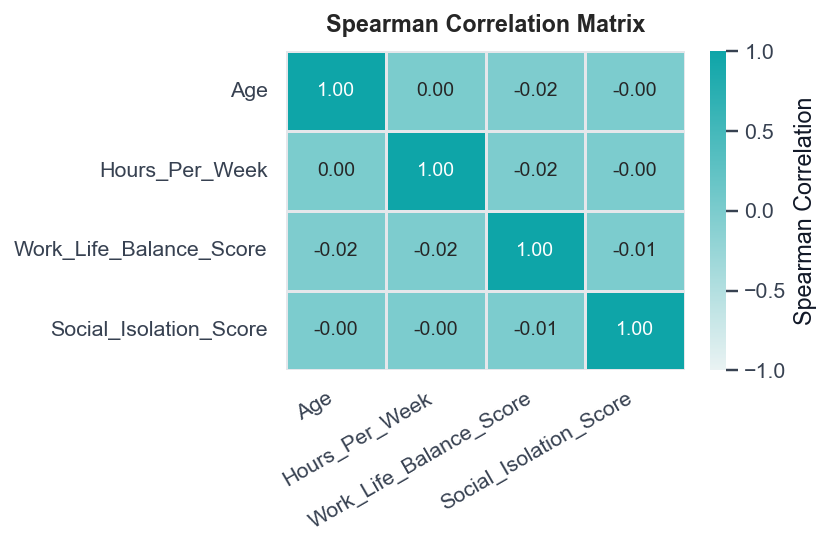

In [181]:
corr = df_copy[num_cols].corr(method="spearman")

BASE = "#0EA5A8"
TEXT = "#111827"

plt.figure(figsize=(6, 4), dpi=140)

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=sns.light_palette(BASE, as_cmap=True),  # один цвет + оттенки
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.6,
    linecolor="#E5E7EB",
    cbar_kws={"label": "Spearman Correlation"}
)

plt.title(
    "Spearman Correlation Matrix",
    pad=10,
    fontweight="bold"
)

plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Spearman Correlation Heatmap

The Spearman correlation heatmap indicates no meaningful monotonic relationships between age, weekly working hours, work–life balance, and social isolation scores. All correlation coefficients are close to zero, suggesting very weak or no associations between the variables.

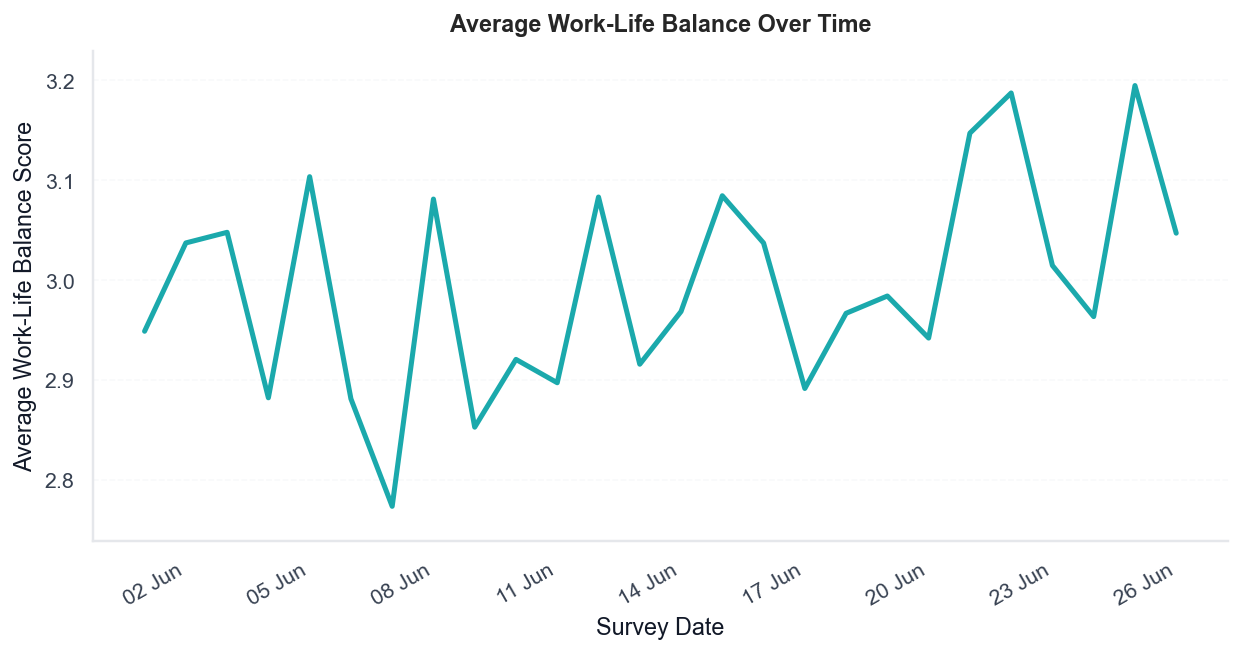

In [217]:
# 1) CLEAN + PREP
df_plot = df_copy.copy()

df_plot["Survey_Date"] = pd.to_datetime(df_plot["Survey_Date"], errors="coerce")
df_plot["Work_Life_Balance_Score"] = pd.to_numeric(
    df_plot["Work_Life_Balance_Score"], errors="coerce"
)

df_plot = (
    df_plot
    .dropna(subset=["Survey_Date", "Work_Life_Balance_Score"])
    .sort_values("Survey_Date")
)

if df_plot.empty:
    raise ValueError("No valid data after cleaning Survey_Date and Work_Life_Balance_Score.")

# 2) SMART AGGREGATION
date_min = df_plot["Survey_Date"].min()
date_max = df_plot["Survey_Date"].max()
span_days = (date_max - date_min).days

use_monthly = span_days > 90

if use_monthly:
    df_plot["Time"] = df_plot["Survey_Date"].dt.to_period("M").dt.to_timestamp()
    xlabel = "Month"
    date_fmt = "%b %Y"
else:
    df_plot["Time"] = df_plot["Survey_Date"].dt.floor("D")
    xlabel = "Survey Date"
    date_fmt = "%d %b"

ts = (
    df_plot
    .groupby("Time", as_index=False)["Work_Life_Balance_Score"]
    .mean()
    .sort_values("Time")
)

# 3) STYLE 
TEXT = "#111827"
GRID = "#E5E7EB"
BASE = "#0EA5A8"   # main wellness teal 
EDGE = "#0F766E"   # darker teal for accents

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": GRID,
    "axes.labelcolor": TEXT,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "font.size": 11
})

fig, ax = plt.subplots(figsize=(9, 4.8), dpi=140)

# Markers only if few points 
show_markers = len(ts) <= 12

ax.plot(
    ts["Time"],
    ts["Work_Life_Balance_Score"],
    linewidth=2.6,
    color=BASE,
    marker="o" if show_markers else None,
    markersize=5 if show_markers else 0,
    markerfacecolor=BASE,
    markeredgecolor=EDGE,
    markeredgewidth=0.8,
    alpha=0.95
)

# 4) TITLES / LABELS
ax.set_title("Average Work-Life Balance Over Time", pad=10, fontweight="bold")
ax.set_xlabel(xlabel)
ax.set_ylabel("Average Work-Life Balance Score")

# 5) DATE AXIS FORMATTING
if use_monthly:
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
else:
    if span_days <= 14:
        interval = 1
    elif span_days <= 45:
        interval = 3
    else:
        interval = 7
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax.xaxis.set_major_formatter(mdates.DateFormatter(date_fmt))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# 6) CLEAN LOOK 
ax.grid(True, axis="y", linestyle="--", linewidth=0.8, alpha=0.25, color=GRID)
ax.grid(False, axis="x")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# small padding on y
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymin - 0.03*(ymax-ymin), ymax + 0.03*(ymax-ymin))

plt.tight_layout()
plt.show()

Line Plot 

The average work–life balance score shows minor fluctuations over time while remaining within a stable mid-range level. No clear upward or downward trend is observed, indicating overall stability in perceived work–life balance throughout the analyzed period.

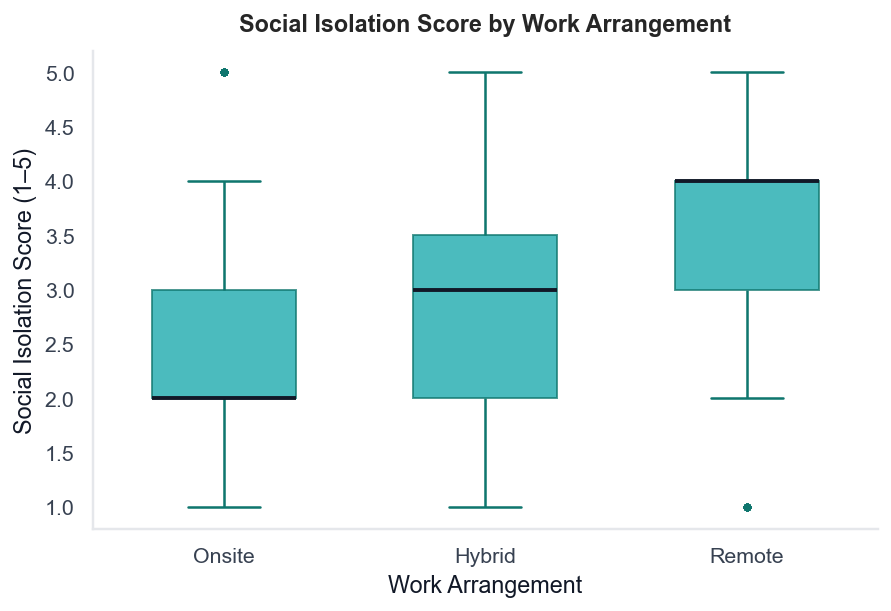

In [213]:
BASE = "#0EA5A8"
EDGE = "#0F766E"
TEXT = "#111827"
GRID = "#E5E7EB"

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": GRID,
    "axes.labelcolor": TEXT,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "font.size": 11
})

fig, ax = plt.subplots(figsize=(6.5, 4.5), dpi=140)

sns.boxplot(
    data=df_copy,
    x="Work_Arrangement",
    y="Social_Isolation_Score",
    order=["Onsite", "Hybrid", "Remote"],
    width=0.55,
    showcaps=True,
    boxprops=dict(facecolor=BASE, edgecolor=EDGE, alpha=0.75),
    whiskerprops=dict(color=EDGE, linewidth=1.3),
    capprops=dict(color=EDGE, linewidth=1.3),
    medianprops=dict(color=TEXT, linewidth=2),
    flierprops=dict(
        marker="o",
        markersize=3,
        markerfacecolor=EDGE,
        markeredgecolor=EDGE,
        alpha=0.3
    ),
    ax=ax
)

# Titles & labels
ax.set_title(
    "Social Isolation Score by Work Arrangement",
    pad=10,
    fontweight="bold"
)
ax.set_xlabel("Work Arrangement")
ax.set_ylabel("Social Isolation Score (1–5)")

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


Boxplot

This boxplot illustrates the distribution of social isolation scores across different work arrangements. Remote workers exhibit higher median social isolation levels and greater variability compared to onsite and hybrid workers, indicating increased feelings of isolation associated with remote work.

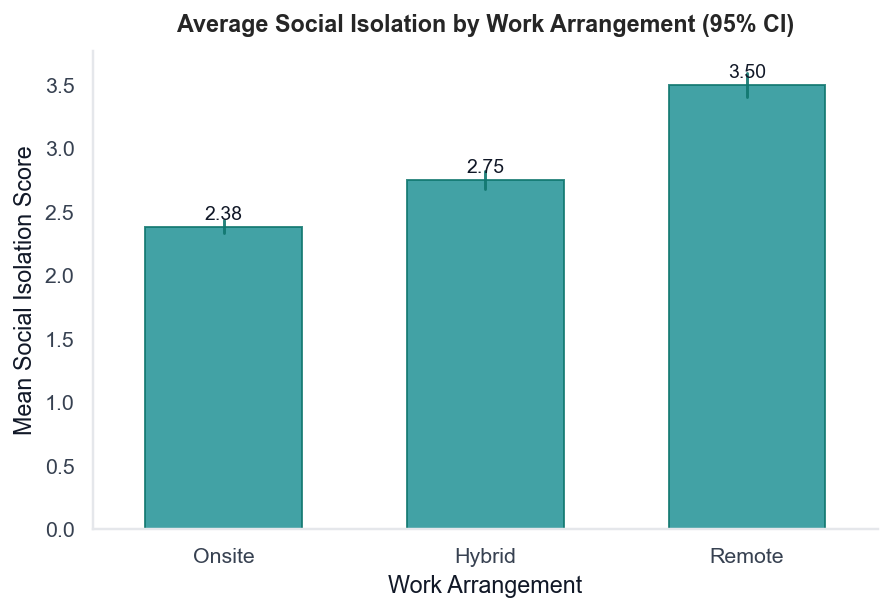

In [203]:
BASE = "#0EA5A8"
EDGE = "#0F766E"
TEXT = "#111827"
GRID = "#E5E7EB"

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": GRID,
    "axes.labelcolor": TEXT,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "font.size": 11
})

fig, ax = plt.subplots(figsize=(6.5, 4.5), dpi=140)

sns.barplot(
    data=df_copy,
    x="Work_Arrangement",
    y="Social_Isolation_Score",
    order=["Onsite", "Hybrid", "Remote"],
    errorbar=("ci", 95),
    color=BASE,
    edgecolor=EDGE,
    alpha=0.85,
    width=0.6,
    err_kws={
        "color": EDGE,
        "linewidth": 1.5,
        "alpha": 0.9
    },
    ax=ax
)

# VALUE LABELS (means)
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.03,                 
        f"{height:.2f}",               
        ha="center",
        va="bottom",
        fontsize=10,
        color=TEXT,
        fontweight="medium"
    )

# Titles & labels
ax.set_title(
    "Average Social Isolation by Work Arrangement (95% CI)",
    pad=10,
    fontweight="bold"
)
ax.set_xlabel("Work Arrangement")
ax.set_ylabel("Mean Social Isolation Score")

# Clean look
ax.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

Bar chart

This bar chart presents the mean social isolation scores by work arrangement, with 95% confidence intervals. Remote workers report the highest average levels of social isolation, followed by hybrid workers, while onsite workers report the lowest levels, highlighting clear group-level differences.

**Questions:**
1. What is the distribution of stress levels?
2. What is the relationship between sleep duration and productivity?
3. Do health indicators differ by gender or age group?


### Q1: ❓ Distributions of Numerical Variables
The distribution of stress-related indicators suggests that a substantial proportion of respondents experience moderate to high levels of stress, with stress disorder, burnout, and PTSD being the most commonly reported conditions.

### Q2: ❓Data Availability Note
The dataset does not include measures of sleep duration or productivity. Therefore, no direct analysis of the relationship between sleep and productivity can be conducted based on the available data.

### Q3: ❓ Correlation & Subgroup Analysis
Stress-related conditions are relatively evenly distributed across age groups, with a modest increase observed among older respondents. 
Health-related indicators show no substantial differences by gender, suggesting broadly similar well-being outcomes across gender groups in this dataset.

#### ✅ Key Takeaway  

Visual exploration reveals that:
- Stress-related indicators are moderately distributed  
- No strong relationships exist between age, workload, and well-being  
- Work arrangement plays a more significant role than demographics  

Overall, **psychosocial context appears more influential than individual characteristics in shaping health outcomes**.

### 🧩 7. Summary and Interpretation

**Steps:**
- Summarize the key learnings from the data cleaning and analysis process.
- Draw conclusions about data quality.
- Suggest additional analyses for further insights.

# 🧩 Summary and Interpretation

### 🧠 Key Learnings from Data Cleaning and Analysis
The data cleaning process confirmed a high level of overall data consistency.

- Missing values were identified and handled using **context-aware imputation strategies** for selected categorical variables.
- Numerical variables required minimal preprocessing and were found to be well-bounded and realistic.
- Outlier detection using both **IQR and z-score methods** revealed no extreme or anomalous values.
- Exploratory analysis showed stable distributions across age, working hours, work–life balance, and social isolation.
- Correlation analysis indicated **weak overall associations** between numerical variables.
- Group-based comparisons uncovered meaningful patterns, particularly across **work arrangement** and **burnout levels**.

Notably, remote work was associated with higher social isolation, while higher burnout levels were linked to poorer work–life balance and increased isolation.

### 📊 Conclusions about Data Quality

The dataset demonstrates **high data quality and analytical reliability**:

- Categorical distributions are well-defined and interpretable.
- Missing values are limited and clearly accounted for.
- Consistency between descriptive statistics, correlations, and group comparisons supports internal validity.

These characteristics indicate that the dataset provides a solid foundation for further inferential and predictive analyses.

### 💡Suggestions for Additional Analyses 
To gain deeper insights, future analyses could incorporate: 
- Longitudinal data to examine changes in well-being indicators over time. 
- More granular measures of remote work, such as duration or intensity, to better assess its impact. 
- Additional psychosocial variables, including sleep patterns, productivity, and social support, to explain variations in stress and burnout. 
- Statistical significance testing (e.g., ANOVA or non-parametric tests) to formally assess group differences. -Predictive modeling to identify key drivers of burnout and social isolation.

### 🧾 Overall Insight
Overall, the analysis highlights that employee well-being in post-pandemic work environments is shaped more by **psychosocial and contextual factors** than by demographic characteristics or working hours alone.
While the dataset is analytically sound, further data enrichment and targeted organizational interventions could significantly enhance both analytical insight and employee well-being outcomes.


**Questions:**
1. Has the dataset been cleaned sufficiently for analysis?
2. Which additional features would be valuable if more data were collected?
3. Based on the analysis, which measures could improve the health of remote workers?


### ❓ Question 1  
**Has the dataset been cleaned sufficiently for analysis?**

**Answer:** Yes.

- Missing data were transparently identified and addressed using appropriate strategies.
- Numerical variables fall within realistic and bounded ranges.
- No extreme outliers or systematic data errors were detected.
- Distributions are stable and consistent across key variables.

Overall, the dataset demonstrates strong internal consistency and is suitable for exploratory, comparative, and descriptive analysis.


### ❓ Question 2  
**Which additional features would be valuable if more data were collected?**

To enhance analytical depth and explanatory power, future data collection could include:

- **Sleep-related variables** (sleep duration, sleep quality)
- **Productivity indicators** (self-reported productivity, task completion metrics)
- **Remote work intensity** (duration of remote work, percentage of remote days)
- **Social support measures** (team interaction frequency, managerial support)
- **Physical activity and lifestyle factors**
- **Work environment characteristics** (home office setup, ergonomics)

These variables would allow for more robust causal inference and deeper understanding of mechanisms linking work arrangements to health outcomes.


### ❓ Question 3  
**Based on the analysis, which measures could improve the health of remote workers?**

Based on the findings—particularly elevated social isolation among remote workers—the following measures are recommended:

- Structured social interaction initiatives (regular team check-ins, virtual collaboration sessions)
- Clear work–life boundary policies to prevent perceived overload
- Access to mental health support programs and counseling services
- Hybrid or flexible work options to reduce prolonged isolation
- Manager training to recognize early signs of burnout and isolation

The analysis suggests that improving remote worker health requires addressing **psychosocial and organizational factors**, rather than focusing solely on workload reduction.
